### Xinlin Ying
### NUID 001535622
A typical fully connected neural network model (DNN), which is also called a deep neural network in some occasions. Unlike traditional perceptrons, each node has an operational relationship with all nodes in the next layer, which is the name The meaning of 'full connection' in the above figure also becomes the hidden layer. The fully connected neural network usually has multiple hidden layers. Adding hidden layers can better separate the features of the data. The major advantage of fully connected networks is that they are “structure agnostic”.

Each level uses the output of the previous level as input, and then through the combined calculation in the circle, the output is output to the next level. The purpose of f(z) is to compress the output range to (0, 1), which is the so-called normalization, because the output value of each stage will be used as the input of the next stage, only the input is normalized It will avoid a certain input infinity.
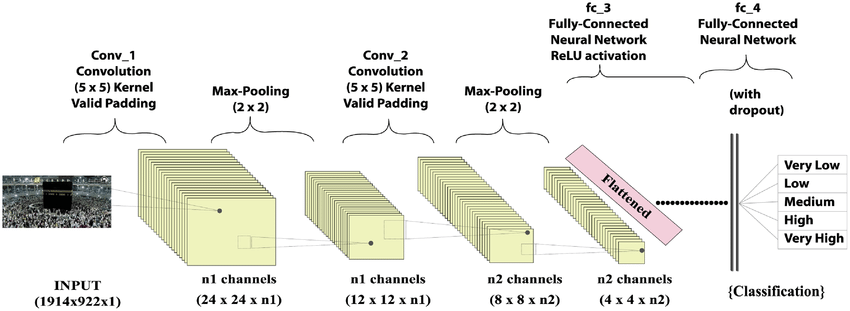

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.applications import VGG16
import warnings
import warnings
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F 
import torch
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset
df=pd.read_csv('94_character_TMNIST.csv')
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## EDA   
We successfully loaded the TMNIST data set

In [3]:
#size of dataframe
print('Total number of rows in datafame',df.shape[0])
print('Total number of columns in datafame',df.shape[1])
#getting total number of unique classes present in the dataframe
num_classes=df['labels'].nunique()
print('Total number of classes are ',num_classes)
#printing all the unique classes
print(df['labels'].unique())
#getting the total number of font types present in the data
num_font=df['names'].nunique()
print('The total number of different type of fonts present are -',num_font)

Total number of rows in datafame 274093
Total number of columns in datafame 786
Total number of classes are  94
['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']
The total number of different type of fonts present are - 2990


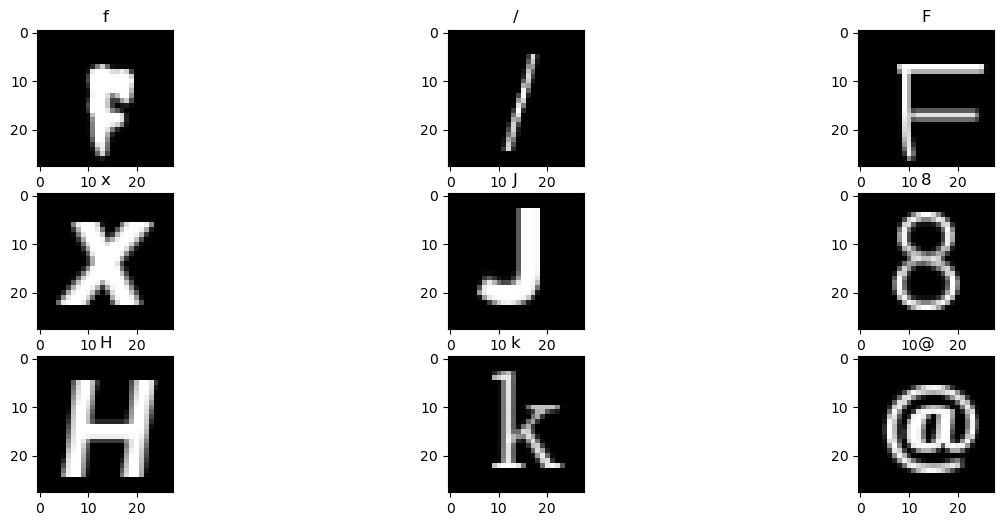

In [14]:
#defining the class column and removing other unneccesary columns
y=df['labels']
X=df.drop(['names','labels'],axis=1)
#plotting some of the values and corresponding labels as title
plt.figure(figsize=(15, 6))
for i in range(2,11):  
  plt.subplot(3,3,i-1)
  plt.title(y.iloc[i])
  plt.imshow(X.values[i].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()

In [15]:
#splitiing the data into test and train
#we are using stratified sampling in order to get same distribution of classes in train and test data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42,stratify=y)

Text(0, 0.5, 'Count')

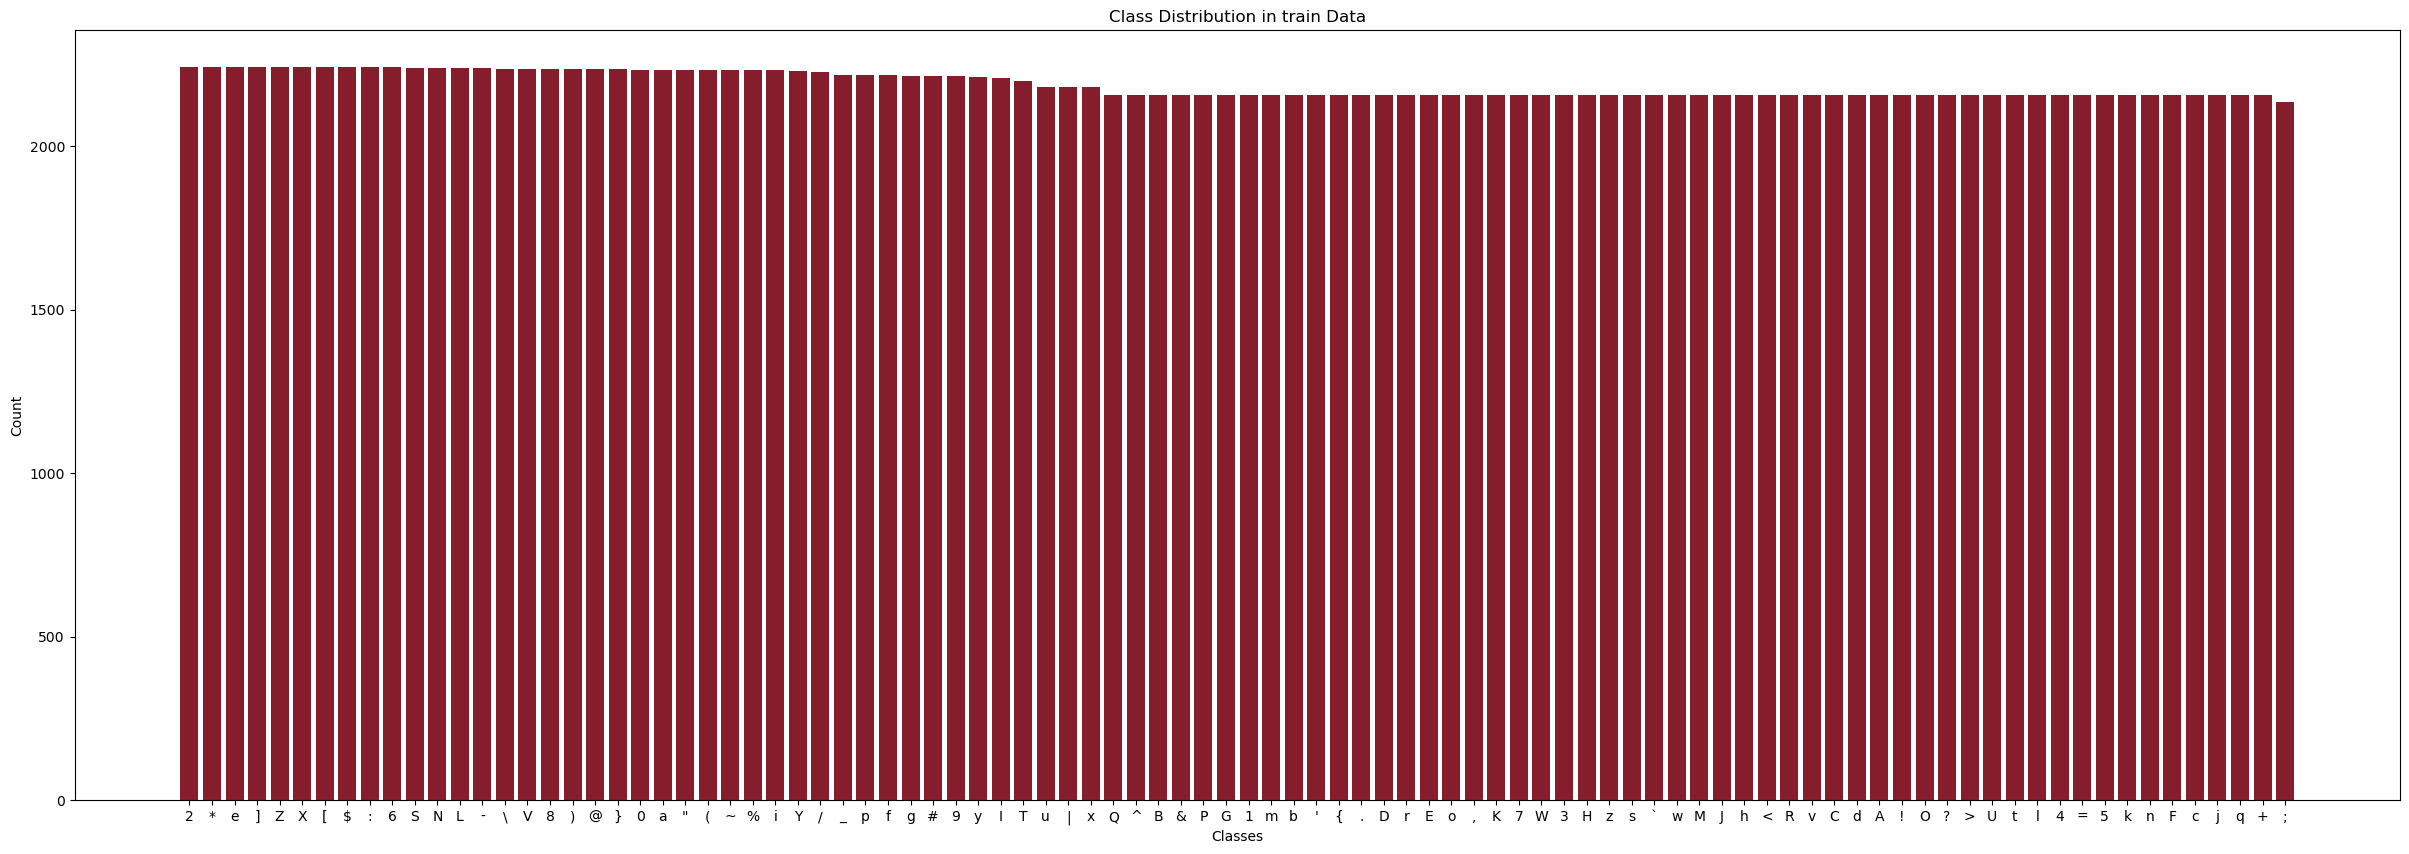

In [16]:
#checking the distribution of train and test dataset

plt.figure(figsize=(30, 10))
plt.bar(y_train.unique(),y_train.value_counts(),color='#851D2D')
plt.title('Class Distribution in train Data')
plt.xlabel('Classes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

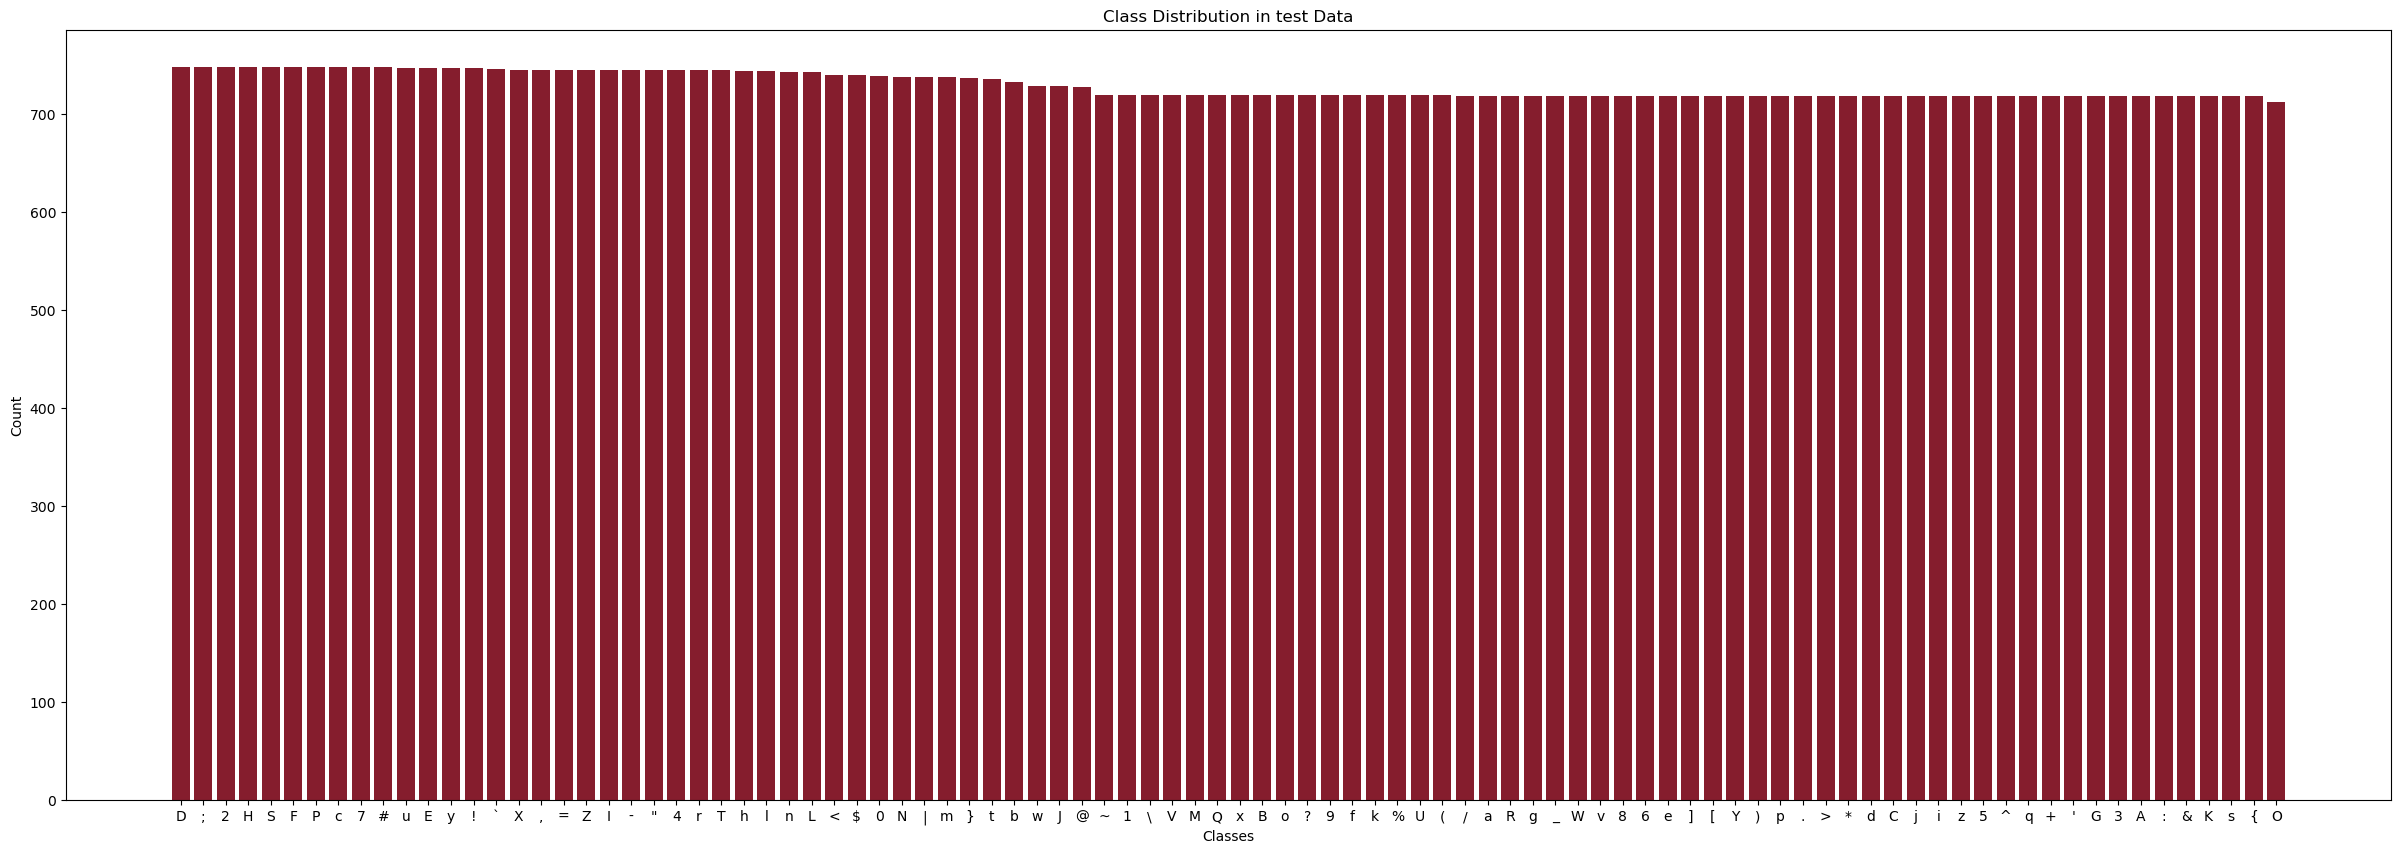

In [17]:
plt.figure(figsize=(30, 10))
plt.bar(y_test.unique(),y_test.value_counts(),color='#851D2D')
plt.title('Class Distribution in test Data')
plt.xlabel('Classes')
plt.ylabel('Count')

In [18]:
#the pixel values are from 0-255, for neural network models we are squishing them between 0-1 
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

In [19]:
#encoding the y values using one hot encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded=enc.fit_transform(y_train.values.reshape(-1,1))
y_test_encoded=  enc.transform(y_test.values.reshape(-1,1))

In [20]:
X_train_norm=X_train.values.reshape(X_train.shape[0],28,28)
X_test_norm=X_test.values.reshape(X_test.shape[0],28,28)

Find an image dataset. It cannot be MNIST or CFFAR but can be TMNIST. For TMNIST-Alphabet (94 characters and over 281,000 images) see https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-charactersLinks to an external site.

The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.

But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.

Activation Function: Relu
Cost Function: Categorical Cross Entropy  
Epochs length: 30  
Gradient Estimation: Adam  
Network Initialization: Glorot Uniform  
    

In [27]:
#since each pixel is a number between 0-1 we will first start with basic Neural Network
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [28]:
#fitting the model
model_history=model.fit(X_train_norm, y_train_encoded, epochs=30, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/30


2022-11-29 21:08:29.973533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-29 21:08:41.757711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1607/1607 - 15s - loss: 0.8230 - accuracy: 0.7858 - val_loss: 0.5233 - val_accuracy: 0.8422 - 15s/epoch - 9ms/step
Epoch 2/30
1607/1607 - 14s - loss: 0.4493 - accuracy: 0.8624 - val_loss: 0.4164 - val_accuracy: 0.8699 - 14s/epoch - 9ms/step
Epoch 3/30
1607/1607 - 15s - loss: 0.3774 - accuracy: 0.8796 - val_loss: 0.3891 - val_accuracy: 0.8793 - 15s/epoch - 9ms/step
Epoch 4/30
1607/1607 - 14s - loss: 0.3380 - accuracy: 0.8892 - val_loss: 0.3810 - val_accuracy: 0.8778 - 14s/epoch - 9ms/step
Epoch 5/30
1607/1607 - 15s - loss: 0.3042 - accuracy: 0.8986 - val_loss: 0.3715 - val_accuracy: 0.8853 - 15s/epoch - 9ms/step
Epoch 6/30
1607/1607 - 14s - loss: 0.2753 - accuracy: 0.9068 - val_loss: 0.3342 - val_accuracy: 0.8983 - 14s/epoch - 9ms/step
Epoch 7/30
1607/1607 - 14s - loss: 0.2518 - accuracy: 0.9137 - val_loss: 0.3350 - val_accuracy: 0.8975 - 14s/epoch - 9ms/step
Epoch 8/30
1607/1607 - 14s - loss: 0.2331 - accuracy: 0.9193 - val_loss: 0.3282 - val_accuracy: 0.9001 - 14s/epoch - 9ms/step
Epo

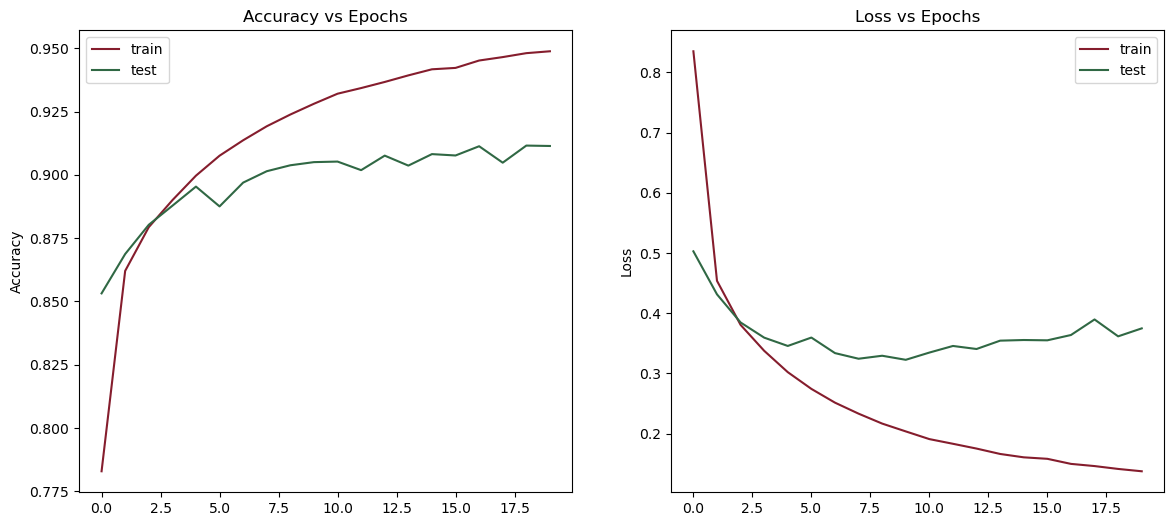

In [23]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

### Changing the baseline network architecture by adding 2 x conv2D layers and 2x MaxPooling layers followed by one flattened layer and 3 x dense layers.

In [24]:
model_2 = Sequential()
model_2.add(Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)))
model_2.add(MaxPooling2D((2, 2)))

model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D((2, 2)))

model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(num_classes, activation='softmax'))

opt = Adam()
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [25]:
X_train_norm=X_train_norm.reshape((X_train_norm.shape[0],28,28,1))
X_test_norm=X_test_norm.reshape((X_test_norm.shape[0],28,28,1))

In [26]:
#fitting the model
model_history2=model_2.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20


2022-11-29 20:55:39.228805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-29 20:56:05.228030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1607/1607 - 31s - loss: 0.7834 - accuracy: 0.7903 - val_loss: 0.4116 - val_accuracy: 0.8702 - 31s/epoch - 19ms/step
Epoch 2/20
1607/1607 - 30s - loss: 0.3562 - accuracy: 0.8912 - val_loss: 0.3004 - val_accuracy: 0.9120 - 30s/epoch - 19ms/step
Epoch 3/20
1607/1607 - 29s - loss: 0.2832 - accuracy: 0.9137 - val_loss: 0.2826 - val_accuracy: 0.9114 - 29s/epoch - 18ms/step
Epoch 4/20
1607/1607 - 29s - loss: 0.2469 - accuracy: 0.9225 - val_loss: 0.2546 - val_accuracy: 0.9231 - 29s/epoch - 18ms/step
Epoch 5/20
1607/1607 - 29s - loss: 0.2230 - accuracy: 0.9297 - val_loss: 0.2495 - val_accuracy: 0.9231 - 29s/epoch - 18ms/step
Epoch 6/20
1607/1607 - 29s - loss: 0.2055 - accuracy: 0.9337 - val_loss: 0.2269 - val_accuracy: 0.9302 - 29s/epoch - 18ms/step
Epoch 7/20
1607/1607 - 32s - loss: 0.1896 - accuracy: 0.9377 - val_loss: 0.2139 - val_accuracy: 0.9344 - 32s/epoch - 20ms/step
Epoch 8/20
1607/1607 - 29s - loss: 0.1779 - accuracy: 0.9407 - val_loss: 0.2219 - val_accuracy: 0.9337 - 29s/epoch - 18ms/

Activation Function: elu
Cost Function: Categorical Cross Entropy  
Epochs length: 30  
Gradient Estimation: Adam  
Network Initialization: Glorot Uniform  

In [45]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='elu'))
model.add(Dense(128,activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(num_classes, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 512)               401920    
                                                                 
 dense_34 (Dense)            (None, 128)               65664     
                                                                 
 dense_35 (Dense)            (None, 32)                4128      
                                                                 
 dense_36 (Dense)            (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [46]:
X_train_norm=X_train_norm.reshape((X_train_norm.shape[0],28,28,1))
X_test_norm=X_test_norm.reshape((X_test_norm.shape[0],28,28,1))

In [48]:
#fitting the model
model_history2=model_2.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20
1607/1607 - 30s - loss: 0.0755 - accuracy: 0.9714 - val_loss: 0.3285 - val_accuracy: 0.9373 - 30s/epoch - 19ms/step
Epoch 2/20
1607/1607 - 30s - loss: 0.0720 - accuracy: 0.9724 - val_loss: 0.3404 - val_accuracy: 0.9357 - 30s/epoch - 18ms/step
Epoch 3/20
1607/1607 - 30s - loss: 0.0731 - accuracy: 0.9721 - val_loss: 0.3420 - val_accuracy: 0.9301 - 30s/epoch - 19ms/step
Epoch 4/20
1607/1607 - 30s - loss: 0.0751 - accuracy: 0.9721 - val_loss: 0.3448 - val_accuracy: 0.9363 - 30s/epoch - 18ms/step
Epoch 5/20
1607/1607 - 29s - loss: 0.0691 - accuracy: 0.9734 - val_loss: 0.3516 - val_accuracy: 0.9335 - 29s/epoch - 18ms/step
Epoch 6/20
1607/1607 - 30s - loss: 0.0772 - accuracy: 0.9714 - val_loss: 0.3493 - val_accuracy: 0.9343 - 30s/epoch - 18ms/step
Epoch 7/20
1607/1607 - 30s - loss: 0.0702 - accuracy: 0.9732 - val_loss: 0.3713 - val_accuracy: 0.9366 - 30s/epoch - 19ms/step
Epoch 8/20
1607/1607 - 30s - loss: 0.0666 - accuracy: 0.9747 - val_loss: 0.3647 - val_accuracy: 0.9359 - 30s/ep

In [52]:
df2 = pd.read_csv('TMNIST_Data.csv/TMNIST_Data.csv')
df2.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
import matplotlib.pyplot as plt
Labels = df2['labels'].to_numpy()
Images = df2.drop(['names','labels'],axis=1).to_numpy()
Images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
Images= (Images.astype('float32'))/255.0

In [56]:
Images = np.reshape(Images, (Images.shape[0] ,28, 28)) 
Images.shape

(29900, 28, 28)

In [57]:
class Dataset(object):
    def __init__(self, csv_file, root_dir, transform=None):
        raise NotImplementedError

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

In [58]:
class myDataSet(Dataset):
    def __init__(self, dataset, labelset, transform):
        self.data_frame = dataset
        self.label_set = labelset
        self.transform = transform
        
    def __len__(self):
        return len(self.data_frame)
 
    def __getitem__(self, index):

        data = self.data_frame[index]
        label = self.label_set[index]
 
        if self.transform :
            data = self.transform(data)
 
        return data, label

In [65]:
data1 = Images
label1 = Labels
 
# Read Data
train_dataset = myDataSet(
    dataset = data1,
    labelset = label1,
    transform = transforms.Compose([transforms.ToTensor()]))

# Load Data
train_iter = torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True)

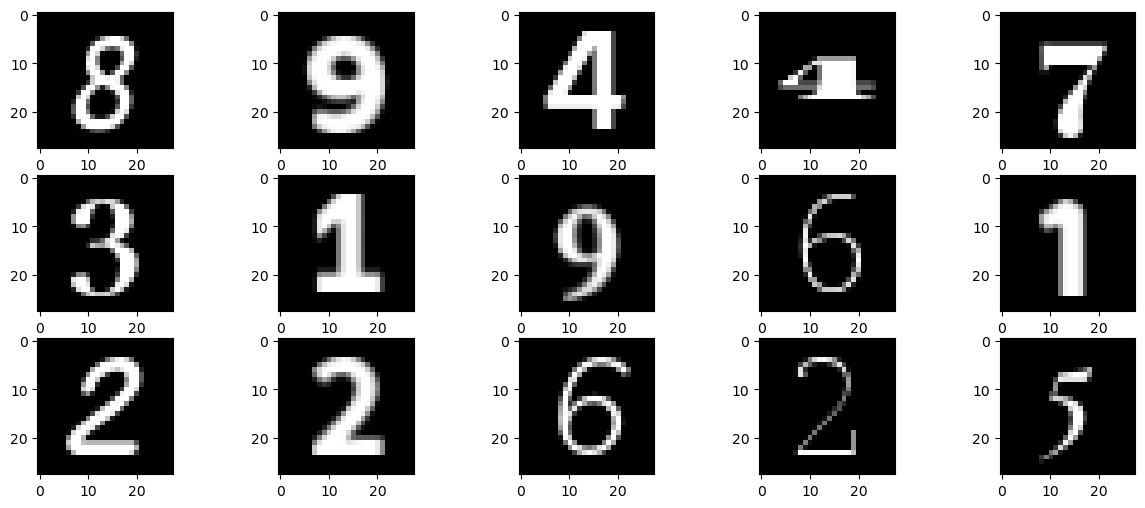

tensor([8, 9, 4, 4, 7, 3, 1, 9, 6, 1, 2, 2, 6, 2, 5, 5, 4, 8, 2, 6, 8, 4, 9, 1,
        9, 1, 8, 1, 5, 8, 7, 7, 7, 2, 8, 3, 3, 0, 3, 4, 9, 6, 4, 9, 0, 9, 3, 5,
        8, 6, 1, 5, 9, 0, 8, 8, 1, 8, 0, 9, 8, 6, 1, 0])

In [67]:
image, label = next(iter(train_iter))

plt.figure(figsize=(15, 6))
for i in range(15):  
    plt.subplot(3,5,i+1)
    plt.imshow(image[i].reshape(28,28),cmap='gray')
plt.show()
label


In [68]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [71]:
model = Classifier()
criterion = nn.NLLLoss() # Define the loss function as a negative logarithmic loss function

optimizer = optim.Adam(model.parameters(), lr=0.003) # The optimization method is the Adam gradient descent method

epochs = 30
train_losses, test_losses, accuracy_list = [], [], []

for e in range(epochs): # Start learning
    running_loss = 0
    
    for images, labels in train_iter:
        optimizer.zero_grad() # Set the derivation results in the optimizer to 0

        log_ps = model(images)
        # Calculate the loss function
        loss = criterion(log_ps, labels)
        loss.backward() # backpropagate the optimized weights
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            
            for images, labels in train_iter:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                # use similar way to do the test
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        model.train()
        
        accuracy_list.append(accuracy/len(train_iter))
        train_losses.append(running_loss/len(train_iter))
        test_losses.append(test_loss/len(train_iter))
        
        print("Loss: {:.3f}.. ".format(running_loss/len(train_iter)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(train_iter)),
              "Accuracy: {:.3f}".format(accuracy/len(train_iter)))

Loss: 0.197..  Test Loss: 0.092..  Accuracy: 0.973
Loss: 0.090..  Test Loss: 0.065..  Accuracy: 0.978
Loss: 0.067..  Test Loss: 0.043..  Accuracy: 0.987
Loss: 0.060..  Test Loss: 0.070..  Accuracy: 0.980
Loss: 0.046..  Test Loss: 0.027..  Accuracy: 0.991
Loss: 0.043..  Test Loss: 0.028..  Accuracy: 0.991
Loss: 0.038..  Test Loss: 0.026..  Accuracy: 0.992
Loss: 0.036..  Test Loss: 0.055..  Accuracy: 0.984
Loss: 0.035..  Test Loss: 0.021..  Accuracy: 0.994
Loss: 0.025..  Test Loss: 0.018..  Accuracy: 0.994
Loss: 0.033..  Test Loss: 0.036..  Accuracy: 0.990
Loss: 0.024..  Test Loss: 0.028..  Accuracy: 0.993
Loss: 0.032..  Test Loss: 0.017..  Accuracy: 0.995
Loss: 0.022..  Test Loss: 0.043..  Accuracy: 0.991
Loss: 0.028..  Test Loss: 0.011..  Accuracy: 0.996
Loss: 0.024..  Test Loss: 0.018..  Accuracy: 0.995
Loss: 0.019..  Test Loss: 0.024..  Accuracy: 0.993
Loss: 0.022..  Test Loss: 0.017..  Accuracy: 0.995
Loss: 0.023..  Test Loss: 0.016..  Accuracy: 0.995
Loss: 0.023..  Test Loss: 0.013

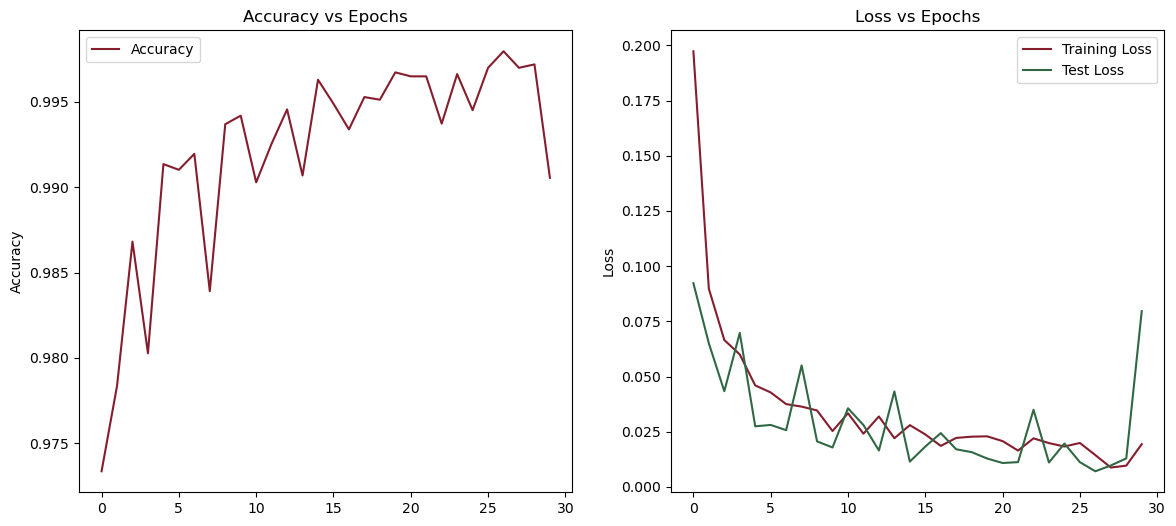

In [72]:
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.title('Accuracy vs Epochs')
plt.plot(accuracy_list,label='Accuracy', color='#851D2D')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(train_losses,label='Training Loss', color='#851D2D')
plt.ylabel('Loss')
plt.plot(test_losses,label='Test Loss', color='#306844')
plt.legend()
plt.show()

### References  
use the code from the kaggle website and change some parameters   
1、Dataset: https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters
https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist
    
2、TMNIST (Typeface MNIST) implement:https://www.kaggle.com/code/daijing11/assignment-tmnist  

3、CNN Implementation: https://www.kaggle.com/code/nikbearbrown/tmnist-cnn-starter/data?scriptVersionId=98117660
https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist

4、Cost Function: https://vitalflux.com/mean-squared-error-vs-cross-entropy-loss-function/#:~:text=Mean%20squared%20error%20(MSE)%20loss%20is%20calculated%20by%20taking%20the,will%20be%20our%20final%20result.
5、Activation Functions: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6